# HOMEWORK 2

## California Housing Prices Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Preparation

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


All the feature names are looking clean we don't need to change anything.

In [3]:
df = df.loc[:,'longitude':'median_house_value']
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [4]:
df.shape

(20640, 9)

### Let's check the types of the columns. We can do this by using either .info() or .dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


'total_bedrooms' feature has some null values.

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

### Distribution Of Price

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

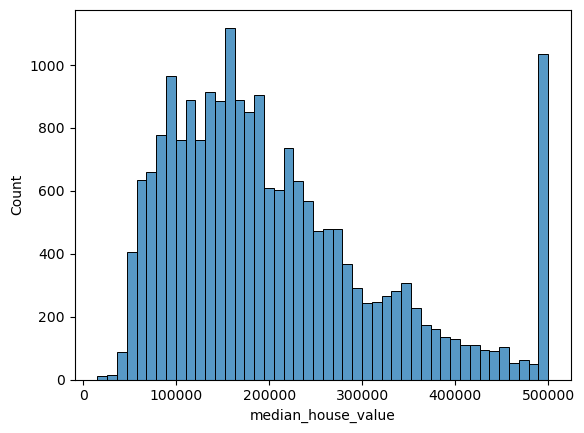

In [7]:
sns.histplot(df['median_house_value'])

We see here right skewed (long tail) distribution and at the price of 500k there are many samples. In order to have a better distribution in our target feature we can use logarithmic scale with np.log() or np.log1p(). (When we have distribution that starts from 0, we should use np.log1p because np.log() throws an error.

In [8]:
df['median_house_value'].min()

14999.0

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

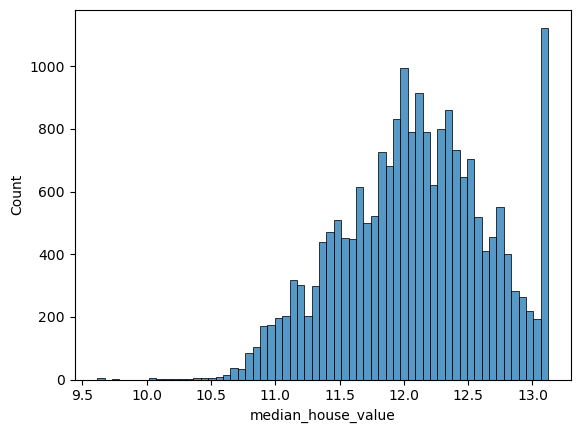

In [9]:
price_logs = np.log(df['median_house_value'])
sns.histplot(price_logs)

We have a graph that closer to the normal distribution.

## Question 1

- Find a feature with missing values. How many missing values does it have?

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 1: 'total_bedrooms' feature has 207 NaN values. We have to handle missing values before we move on otherwise NaN values will negatively affect our model.

## Question 2

- What's the median (50% percentile) for variable 'population'?

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Question 2: 50% percentile of the 'population' is 1166.

### Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [12]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-n_val-n_test

n, n_train + n_val + n_test

(20640, 20640)

In [13]:
n_train, n_val, n_test

(12384, 4128, 4128)

In [14]:
np.random.seed(42)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
df_shuffled

df_train = df_shuffled[:n_train]
df_val = df_shuffled[n_train:n_train + n_val]
df_test = df_shuffled[n_train + n_val:]

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train_og = df_train['median_house_value'].values
y_val_og = df_val['median_house_value'].values
y_test_og = df_test['median_house_value'].values

y_train = np.log(df_train['median_house_value'].values)
y_val = np.log(df_val['median_house_value'].values)
y_test = np.log(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


Target value deleted from df_train, df_val and df_test.

### Lineer Regression

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline Solution

In [19]:
columns = list(df_train.columns)
columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

#### Missing values filled with 0

In [20]:
def prepare_X_fill_0(df):
    df_num = df[columns]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [21]:
X_train = prepare_X_fill_0(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [22]:
y_pred = w_0 + X_train.dot(w)

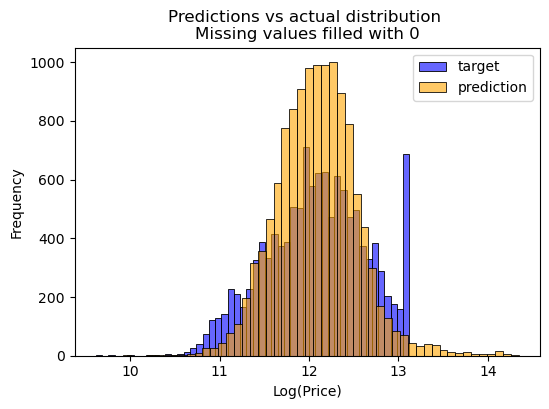

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=50)
sns.histplot(y_pred, label='prediction', color='orange', alpha=0.6, bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price)')
plt.title('Predictions vs actual distribution \nMissing values filled with 0')

plt.show()

In [24]:
def rmse(y, y_pred):
    mse = ((y_pred - y) ** 2).mean()
    return np.sqrt(mse)

In [25]:
score_train_filled_0 = rmse(y_train, y_pred)
np.round(score_train_filled_0, 2)

0.34

- Use the validation dataset to evaluate the models and compare the RMSE of each option.

In [26]:
X_val = prepare_X_fill_0(df_val)
y_pred = w_0 + X_val.dot(w)

In [27]:
score_val = rmse(y_val, y_pred)
score_val_filled_0 = np.round(score_val, 2)
score_val_filled_0

0.33

#### Missing values filled with mean

In [28]:
def prepare_X_fill_mean(df):
    df_num = df[columns]
    df_num = df_num.fillna(df_train["total_bedrooms"].mean())
    X = df_num.values
    return X

In [29]:
X_train = prepare_X_fill_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [30]:
y_pred = w_0 + X_train.dot(w)

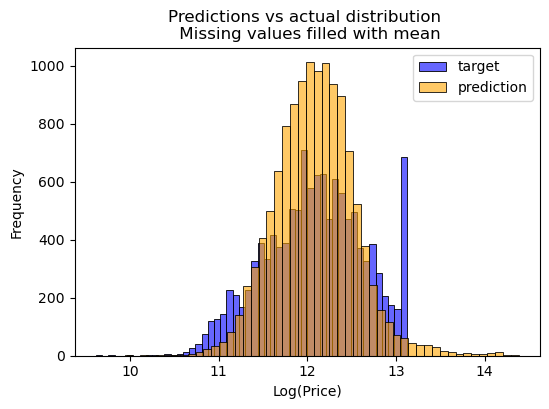

In [31]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=50)
sns.histplot(y_pred, label='prediction', color='orange', alpha=0.6, bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price)')
plt.title('Predictions vs actual distribution \n Missing values filled with mean')

plt.show()

In [32]:
def rmse(y, y_pred):
    mse = ((y_pred - y) ** 2).mean()
    return np.sqrt(mse)

In [33]:
score_train_filled_mean = rmse(y_train, y_pred)
np.round(score_train_filled_mean, 2)

0.34

- Use the validation dataset to evaluate the models and compare the RMSE of each option.

In [34]:
X_val = prepare_X_fill_mean(df_val)
y_pred = w_0 + X_val.dot(w)

In [35]:
score_val = rmse(y_val, y_pred)
score_val_filled_mean = np.round(score_val, 2)
score_val_filled_mean

0.33

Filling missing values with 0 and mean values does not affect the rmse.

In [36]:
print('Score of validation data frame filled with 0   : ' +str(score_val_filled_0))
print('Score of validation data frame filled with mean: ' +str(score_val_filled_mean))

Score of validation data frame filled with 0   : 0.33
Score of validation data frame filled with mean: 0.33


Question 3: Both results are equally good.

## Quesstion 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [37]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [38]:
def rmse(y, y_pred):
    mse = ((y_pred - y) ** 2).mean()
    return np.round(np.sqrt(mse),2)

In [39]:
X_train = prepare_X_fill_0(df_train)
X_val = prepare_X_fill_0(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('r value: ''%6s' %r +' RMSE score: ', rmse(y_val, y_pred))

r value:      0 RMSE score:  0.33
r value:  1e-06 RMSE score:  0.33
r value: 0.0001 RMSE score:  0.33
r value:  0.001 RMSE score:  0.33
r value:   0.01 RMSE score:  0.33
r value:    0.1 RMSE score:  0.33
r value:      1 RMSE score:  0.33
r value:      5 RMSE score:  0.34
r value:     10 RMSE score:  0.34


## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [40]:
rmse_list = []
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for s in seed_list:
    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_og = df_train['median_house_value'].values
    y_val_og = df_val['median_house_value'].values
    y_test_og = df_test['median_house_value'].values

    y_train = np.log(df_train['median_house_value'].values)
    y_val = np.log(df_val['median_house_value'].values)
    y_test = np.log(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
        
    X_train = prepare_X_fill_0(df_train)
    X_val = prepare_X_fill_0(df_val)

    w_0, w = train_linear_regression(X_train, y_train)

    y_pred = w_0 + X_val.dot(w)

    score_val = rmse(y_val, y_pred)
    score_val_filled_0 = np.round(score_val, 2)
    score_val_filled_0

    rmse_list.append(score_val_filled_0)
    
    print('seed: ' + str(s) + 'RMSE score: ' + str(score_val_filled_0))

seed: 0RMSE score: 0.36
seed: 1RMSE score: 0.35
seed: 2RMSE score: 0.35
seed: 3RMSE score: 0.34
seed: 4RMSE score: 0.35
seed: 5RMSE score: 0.33
seed: 6RMSE score: 0.35
seed: 7RMSE score: 0.34
seed: 8RMSE score: 0.34
seed: 9RMSE score: 0.34


In [41]:
print(np.round(np.std(rmse_list), 3))

0.008


## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [42]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_og = df_train['median_house_value'].values
y_test_og = df_test['median_house_value'].values

y_train = np.log(df_train['median_house_value'].values)
y_test = np.log(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_test['median_house_value']

X_train = prepare_X_fill_0(df_train)
X_test = prepare_X_fill_0(df_test)


w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w_0 + X_test.dot(w)

rmse_test = rmse(y_test, y_pred)
rmse_test

0.34